<a href="https://colab.research.google.com/github/Abhiraj-b/codes/blob/main/sea_rescue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!unzip /content/train_data.zip

unzip:  cannot find or open /content/train_data.zip, /content/train_data.zip.zip or /content/train_data.zip.ZIP.


In [16]:
# Create dataset.yaml file
dataset_yaml_content = """
# dataset.yaml

path: /content/train_data   # root directory of your dataset
train: /content/train_data/images/train      # training images
val: /content/train_data/images/val         # validation images

nc: 2                       # number of classes
names: ['person', 'boat']   # class names
"""

with open("dataset.yaml", "w") as f:
    f.write(dataset_yaml_content)

print("dataset.yaml created successfully!")

dataset.yaml created successfully!


In [19]:
# Install ultralytics (YOLOv8)
!pip install ultralytics

# (Optional) Restart runtime if asked

from ultralytics import YOLO

# Load pretrained YOLOv8 small model
model = YOLO("yolov8s.pt")

# Train on your dataset
model.train(
    data="dataset.yaml",
    epochs=20,   # increase if needed
    imgsz=640,
    batch=16
)

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fals

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 19                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1   1969152  ultralytics.nn.modules.block.C2f             [768, 512, 1]                 
 22        [15, 18, 21]  1   2116822  ultralytics.nn.modules.head.Detect           [2, [128, 256, 512]]          
Model summary: 129 layers, 11,136,374 parameters, 11,136,358 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1181.0±587.7 MB/s, size: 1537.0 KB)


train: Scanning /content/train_data/labels/train... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 211.93it/s]

train: New cache created: /content/train_data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1194.2±583.3 MB/s, size: 970.3 KB)


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /content/train_data/labels/val... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 173.88it/s]

val: New cache created: /content/train_data/labels/val.cache



/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.121      6.792      2.037          8        640: 100%|██████████| 4/4 [02:35<00:00, 38.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.69s/it]

                   all         19         22      0.176     0.0714     0.0856     0.0321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      2.858      4.361      1.743         10        640: 100%|██████████| 4/4 [02:11<00:00, 32.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         19         22    0.00687      0.233     0.0419    0.00998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.312      3.002      1.531          8        640: 100%|██████████| 4/4 [02:09<00:00, 32.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.38s/it]

                   all         19         22      0.588        0.3     0.0976     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      2.649      3.506      1.517          7        640: 100%|██████████| 4/4 [02:06<00:00, 31.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.89s/it]

                   all         19         22      0.636      0.349      0.305     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      2.132      2.351      1.566          5        640: 100%|██████████| 4/4 [02:09<00:00, 32.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.74s/it]

                   all         19         22      0.536      0.608      0.401      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G          2      2.092      1.434          9        640: 100%|██████████| 4/4 [02:04<00:00, 31.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.71s/it]

                   all         19         22      0.579      0.648      0.478      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      2.017      2.016      1.392          6        640: 100%|██████████| 4/4 [02:01<00:00, 30.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.22s/it]

                   all         19         22      0.537      0.884      0.735      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      2.141      2.013      1.325          5        640: 100%|██████████| 4/4 [02:00<00:00, 30.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.87s/it]

                   all         19         22      0.523      0.717      0.656       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      2.065       1.77      1.405          9        640: 100%|██████████| 4/4 [02:02<00:00, 30.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.80s/it]

                   all         19         22      0.882      0.524      0.708      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      2.196      1.869      1.397          6        640: 100%|██████████| 4/4 [02:02<00:00, 30.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.51s/it]

                   all         19         22      0.647      0.665      0.703      0.269


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G      2.096      1.773      1.353          4        640: 100%|██████████| 4/4 [02:02<00:00, 30.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.58s/it]

                   all         19         22      0.588      0.816      0.625      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      2.043      1.668      1.487          5        640: 100%|██████████| 4/4 [02:03<00:00, 30.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all         19         22       0.62      0.593      0.632      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      2.187      1.792      1.581          4        640: 100%|██████████| 4/4 [02:02<00:00, 30.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.79s/it]

                   all         19         22      0.626      0.762      0.715      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G       1.91      1.526      1.348          3        640: 100%|██████████| 4/4 [02:03<00:00, 30.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.68s/it]

                   all         19         22      0.718      0.711      0.733      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      2.075      1.543      1.395          4        640: 100%|██████████| 4/4 [02:00<00:00, 30.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.80s/it]

                   all         19         22      0.647      0.719      0.626      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      2.057      1.336      1.429          6        640: 100%|██████████| 4/4 [02:04<00:00, 31.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]

                   all         19         22      0.495      0.552      0.547      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      2.126      1.442      1.442          3        640: 100%|██████████| 4/4 [02:03<00:00, 30.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.90s/it]

                   all         19         22      0.601      0.624      0.617      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.884      1.323      1.375          3        640: 100%|██████████| 4/4 [02:01<00:00, 30.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.73s/it]

                   all         19         22      0.598      0.681      0.597      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.713      1.272      1.305          3        640: 100%|██████████| 4/4 [02:04<00:00, 31.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.25s/it]

                   all         19         22      0.603      0.762       0.67      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.856      1.535      1.271          4        640: 100%|██████████| 4/4 [02:06<00:00, 31.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.37s/it]

                   all         19         22      0.549       0.69      0.598      0.234



20 epochs completed in 0.756 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.31s/it]


                   all         19         22      0.625      0.762      0.717      0.302
                person         15         15      0.423      0.667      0.501      0.144
                  boat          7          7      0.827      0.857      0.933       0.46
Speed: 2.0ms preprocess, 585.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a499d9c05f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/train_data/images/train/vlcsnap-2025-08-04-18h58m25s307.png: 352x640 1 kite, 386.1ms
Speed: 4.6ms preprocess, 386.1ms inference, 6.7ms postprocess per image at shape (1, 3, 352, 640)


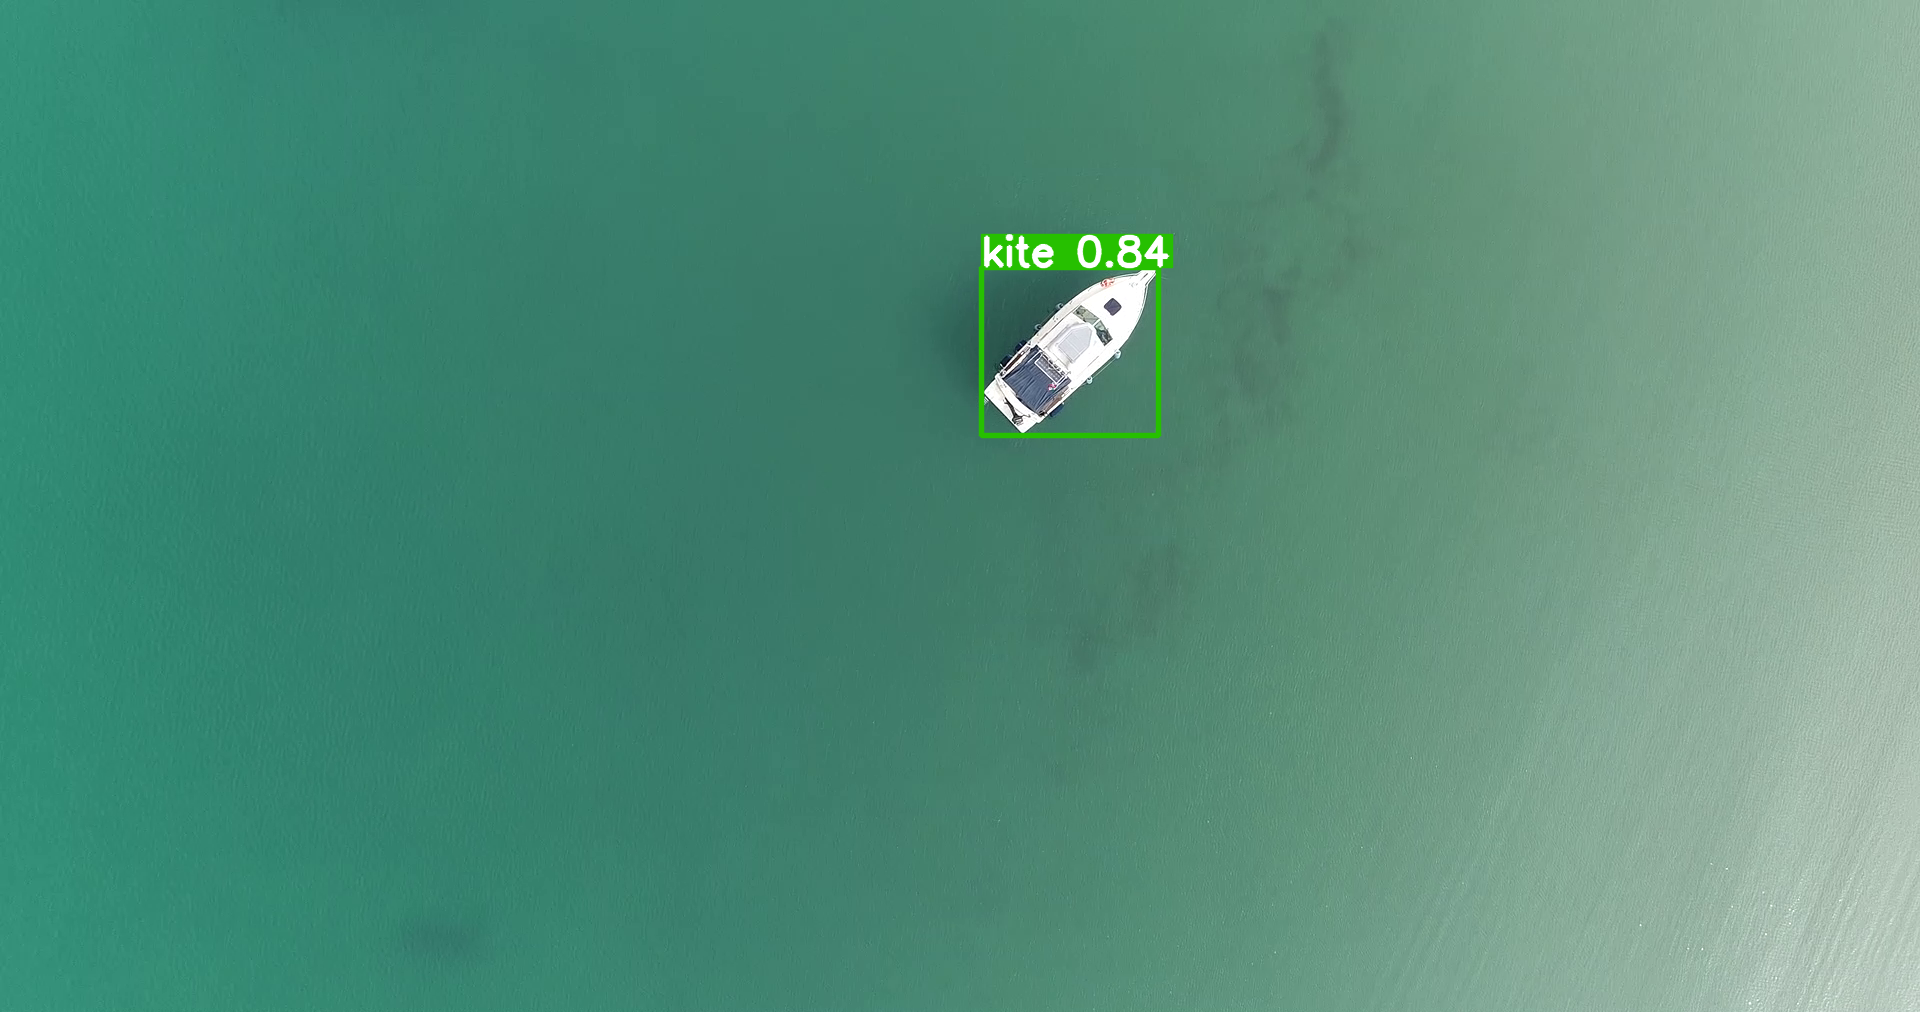

In [30]:
# Load the best trained weights
model = YOLO("yolov8s.pt")

# Run inference on a validation image
results = model("/content/train_data/images/train/vlcsnap-2025-08-04-18h58m25s307.png")  # replace filename
results[0].show()


In [24]:
!ls runs/detect/train


args.yaml  weights


In [13]:
!mkdir /content/train_data
!mv /content/images /content/train_data/
!mv /content/labels /content/train_data/
!ls -R /content/train_data

/content/train_data:
images	labels

/content/train_data/images:
train  val

/content/train_data/images/train:
vlcsnap-2025-08-04-18h56m29s381.png  vlcsnap-2025-08-04-19h03m57s844.png
vlcsnap-2025-08-04-18h56m32s893.png  vlcsnap-2025-08-04-19h04m02s812.png
vlcsnap-2025-08-04-18h56m36s652.png  vlcsnap-2025-08-04-19h04m12s438.png
vlcsnap-2025-08-04-18h57m11s893.png  vlcsnap-2025-08-04-19h04m49s506.png
vlcsnap-2025-08-04-18h57m15s170.png  vlcsnap-2025-08-04-19h04m58s288.png
vlcsnap-2025-08-04-18h57m51s814.png  vlcsnap-2025-08-04-19h05m05s991.png
vlcsnap-2025-08-04-18h57m54s947.png  vlcsnap-2025-08-04-19h05m15s572.png
vlcsnap-2025-08-04-18h58m25s307.png  vlcsnap-2025-08-04-19h05m31s190.png
vlcsnap-2025-08-04-18h58m28s148.png  vlcsnap-2025-08-04-19h05m35s449.png
vlcsnap-2025-08-04-18h58m33s496.png  vlcsnap-2025-08-04-19h05m41s388.png
vlcsnap-2025-08-04-18h58m40s640.png  vlcsnap-2025-08-04-19h06m14s321.png
vlcsnap-2025-08-04-18h58m48s426.png  vlcsnap-2025-08-04-19h06m21s489.png
vlcsnap-2025-0

In [23]:
!ls -R /content/train_data
# Unzip label files into correct folders
!unzip -o "/content/train_data/labels/train labels.zip" -d /content/train_data/labels/train
!unzip -o "/content/train_data/labels/val labels.zip" -d /content/train_data/labels/val

# Remove leftover zips to avoid confusion
!rm "/content/train_data/labels/train labels.zip"
!rm "/content/train_data/labels/val labels.zip"

# Show folder tree again
!ls -R /content/train_data

/content/train_data:
images	labels

/content/train_data/images:
train  val

/content/train_data/images/train:
vlcsnap-2025-08-04-18h56m29s381.png  vlcsnap-2025-08-04-19h03m57s844.png
vlcsnap-2025-08-04-18h56m32s893.png  vlcsnap-2025-08-04-19h04m02s812.png
vlcsnap-2025-08-04-18h56m36s652.png  vlcsnap-2025-08-04-19h04m12s438.png
vlcsnap-2025-08-04-18h57m11s893.png  vlcsnap-2025-08-04-19h04m49s506.png
vlcsnap-2025-08-04-18h57m15s170.png  vlcsnap-2025-08-04-19h04m58s288.png
vlcsnap-2025-08-04-18h57m51s814.png  vlcsnap-2025-08-04-19h05m05s991.png
vlcsnap-2025-08-04-18h57m54s947.png  vlcsnap-2025-08-04-19h05m15s572.png
vlcsnap-2025-08-04-18h58m25s307.png  vlcsnap-2025-08-04-19h05m31s190.png
vlcsnap-2025-08-04-18h58m28s148.png  vlcsnap-2025-08-04-19h05m35s449.png
vlcsnap-2025-08-04-18h58m33s496.png  vlcsnap-2025-08-04-19h05m41s388.png
vlcsnap-2025-08-04-18h58m40s640.png  vlcsnap-2025-08-04-19h06m14s321.png
vlcsnap-2025-08-04-18h58m48s426.png  vlcsnap-2025-08-04-19h06m21s489.png
vlcsnap-2025-0

In [15]:
!ls -R /content/train_data/labels

/content/train_data/labels:
'train labels.zip'  'val labels.zip'
